In [1]:
import math
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
train_datapath = pathlib.Path("C:/Users/35387/Downloads/training_set/training_set")
test_datapath = pathlib.Path("C:/Users/35387/Downloads/test_set/test_set")

In [3]:
train_datapath

WindowsPath('C:/Users/35387/Downloads/training_set/training_set')

In [4]:
len(list(test_datapath.glob('*/*.jpg')))

2023

In [5]:
random_seed=123
batch_size = 32
img_height = 180
img_width = 180

In [6]:
train = tf.keras.preprocessing.image_dataset_from_directory(train_datapath, seed=100, validation_split=0.15, 
                        subset='training',image_size=(img_height, img_width),batch_size=batch_size)

Found 8005 files belonging to 2 classes.
Using 6805 files for training.


In [7]:
test = tf.keras.preprocessing.image_dataset_from_directory(test_datapath, seed=100,image_size=(img_height, img_width),batch_size=batch_size)

Found 2023 files belonging to 2 classes.


In [8]:
validation = tf.keras.preprocessing.image_dataset_from_directory(train_datapath, seed=random_seed, validation_split=0.2,
                                                             subset='validation', image_size=(img_height, img_width), batch_size=batch_size)

Found 8005 files belonging to 2 classes.
Using 1601 files for validation.


In [9]:
class_names = train.class_names
class_map={}

for i in range(len(class_names)):
    class_map[i]=class_names[i][:-1]
class_map

{0: 'cat', 1: 'dog'}

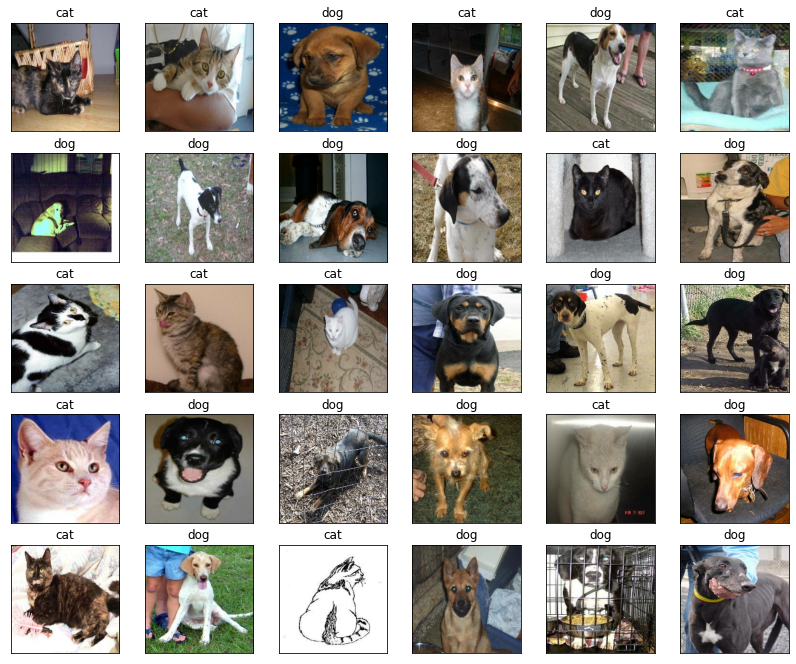

In [10]:
plt.figure(figsize=[14,14])
for image, label in train.take(1):
    for e,i in enumerate(image):
        if e<30:
            plt.subplot(6,6,e+1)
            plt.imshow(i.numpy().astype('uint8'))
            plt.title(class_map[label[e].numpy()])
            plt.xticks([])
            plt.yticks([])
plt.show()

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train = train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [12]:
def plotting(x):
    acc = x.history['accuracy']
    val_acc = x.history['val_accuracy']
    loss = x.history['loss']
    val_loss = x.history['val_loss']
    epochs_range = range(20)
    
    plt.figure(figsize=(30, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(img_height, img_width,3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 97200)             0         
                                                                 
 dense (Dense)               (None, 128)               12441728  
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 12,441,986
Trainable params: 12,441,986
Non-trainable params: 0
_________________________________________________________________


In [14]:
iter1 = model.fit(train, validation_data=validation, epochs=20)

Epoch 1/20


c:\users\35387\miniconda31\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


213/213 [==============================] - 11s 39ms/step - loss: 1688.0676 - accuracy: 0.5133 - val_loss: 305.7545 - val_accuracy: 0.5734
Epoch 2/20
213/213 [==============================] - 8s 37ms/step - loss: 467.3427 - accuracy: 0.5511 - val_loss: 803.8057 - val_accuracy: 0.5122
Epoch 3/20
213/213 [==============================] - 8s 37ms/step - loss: 566.7603 - accuracy: 0.5499 - val_loss: 218.7207 - val_accuracy: 0.5696
Epoch 4/20
213/213 [==============================] - 8s 38ms/step - loss: 285.4079 - accuracy: 0.5791 - val_loss: 539.9636 - val_accuracy: 0.4934
Epoch 5/20
213/213 [==============================] - 8s 38ms/step - loss: 293.3491 - accuracy: 0.5718 - val_loss: 58.7080 - val_accuracy: 0.6533
Epoch 6/20
213/213 [==============================] - 8s 38ms/step - loss: 137.5273 - accuracy: 0.5907 - val_loss: 93.9089 - val_accuracy: 0.5771
Epoch 7/20
213/213 [==============================] - 8s 38ms/step - loss: 87.2663 - accuracy: 0.6069 - val_loss: 114.0131 - val_

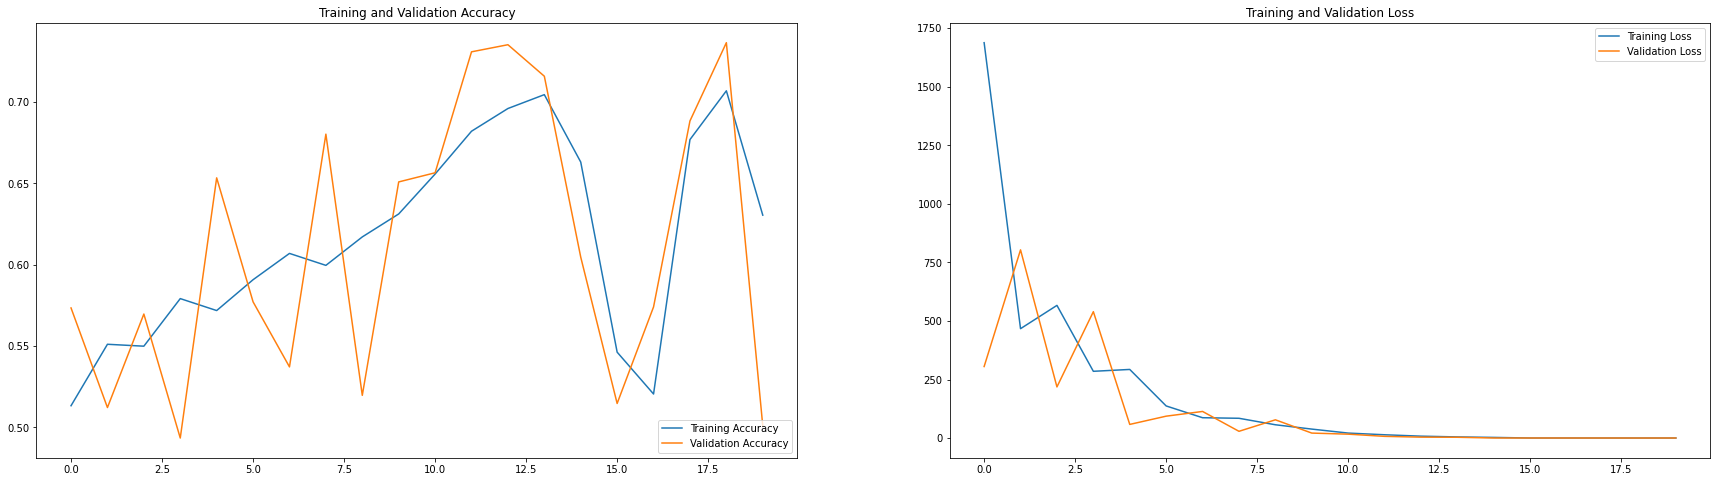

In [15]:
plotting(iter1)

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(img_height, img_width,3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu" ),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 259200)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               33177728  
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                      

In [17]:
iter2 = model.fit(train, validation_data=validation, epochs=20)

Epoch 1/20
213/213 [==============================] - 64s 299ms/step - loss: 1.4014 - accuracy: 0.5799 - val_loss: 0.6177 - val_accuracy: 0.6477
Epoch 2/20
213/213 [==============================] - 61s 289ms/step - loss: 0.5826 - accuracy: 0.6957 - val_loss: 0.5846 - val_accuracy: 0.6808
Epoch 3/20
213/213 [==============================] - 63s 296ms/step - loss: 0.5084 - accuracy: 0.7593 - val_loss: 0.4598 - val_accuracy: 0.7976
Epoch 4/20
213/213 [==============================] - 64s 299ms/step - loss: 0.4091 - accuracy: 0.8215 - val_loss: 0.3864 - val_accuracy: 0.8407
Epoch 5/20
213/213 [==============================] - 62s 292ms/step - loss: 0.3071 - accuracy: 0.8813 - val_loss: 0.3165 - val_accuracy: 0.8707
Epoch 6/20
213/213 [==============================] - 62s 289ms/step - loss: 0.2086 - accuracy: 0.9262 - val_loss: 0.3275 - val_accuracy: 0.8701
Epoch 7/20
213/213 [==============================] - 63s 295ms/step - loss: 0.1329 - accuracy: 0.9606 - val_loss: 0.1977 - val_ac

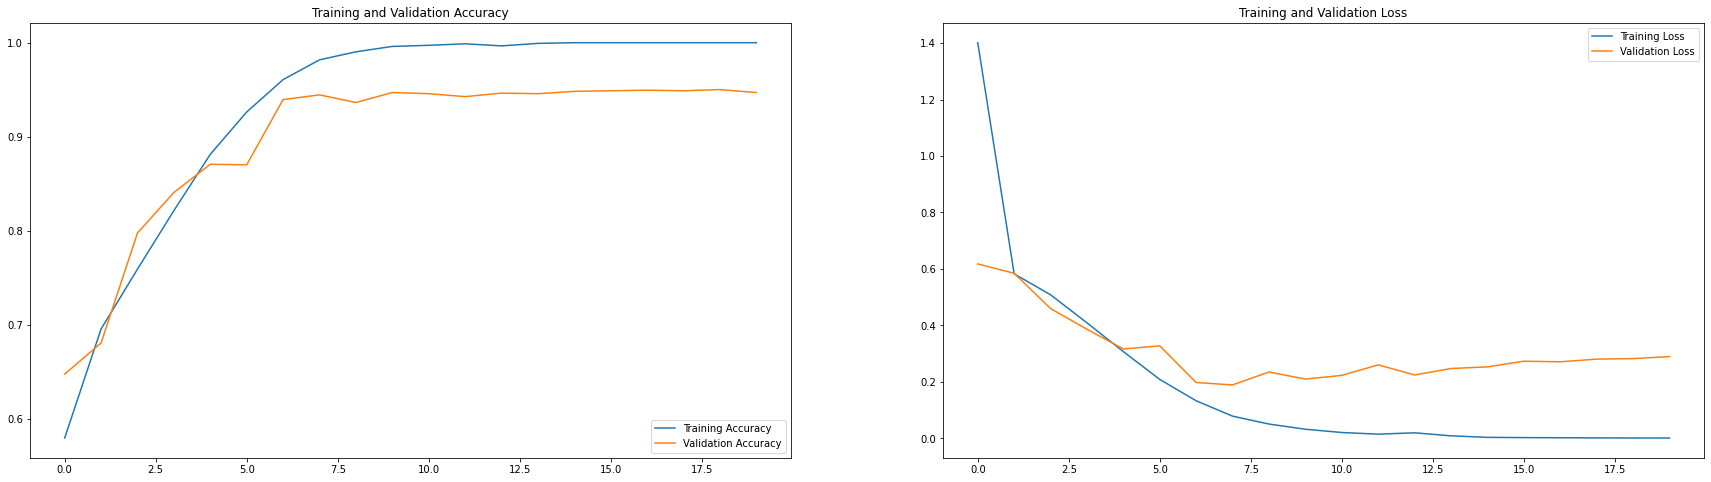

In [18]:
plotting(iter2)

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(img_height, img_width,3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu" ),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu" ),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 129600)           

In [20]:
iter3 = model.fit(train, validation_data=validation, epochs=20)

Epoch 1/20
213/213 [==============================] - 114s 535ms/step - loss: 0.7204 - accuracy: 0.6323 - val_loss: 0.5996 - val_accuracy: 0.6702
Epoch 2/20
213/213 [==============================] - 114s 536ms/step - loss: 0.5035 - accuracy: 0.7544 - val_loss: 0.4451 - val_accuracy: 0.8201
Epoch 3/20
213/213 [==============================] - 113s 533ms/step - loss: 0.3660 - accuracy: 0.8347 - val_loss: 0.2797 - val_accuracy: 0.9019
Epoch 4/20
213/213 [==============================] - 113s 532ms/step - loss: 0.2352 - accuracy: 0.9001 - val_loss: 0.2141 - val_accuracy: 0.9269
Epoch 5/20
213/213 [==============================] - 113s 532ms/step - loss: 0.1302 - accuracy: 0.9518 - val_loss: 0.2181 - val_accuracy: 0.9344
Epoch 6/20
213/213 [==============================] - 114s 535ms/step - loss: 0.0570 - accuracy: 0.9794 - val_loss: 0.2556 - val_accuracy: 0.9413
Epoch 7/20
213/213 [==============================] - 3202s 15s/step - loss: 0.0477 - accuracy: 0.9859 - val_loss: 0.2633 - 

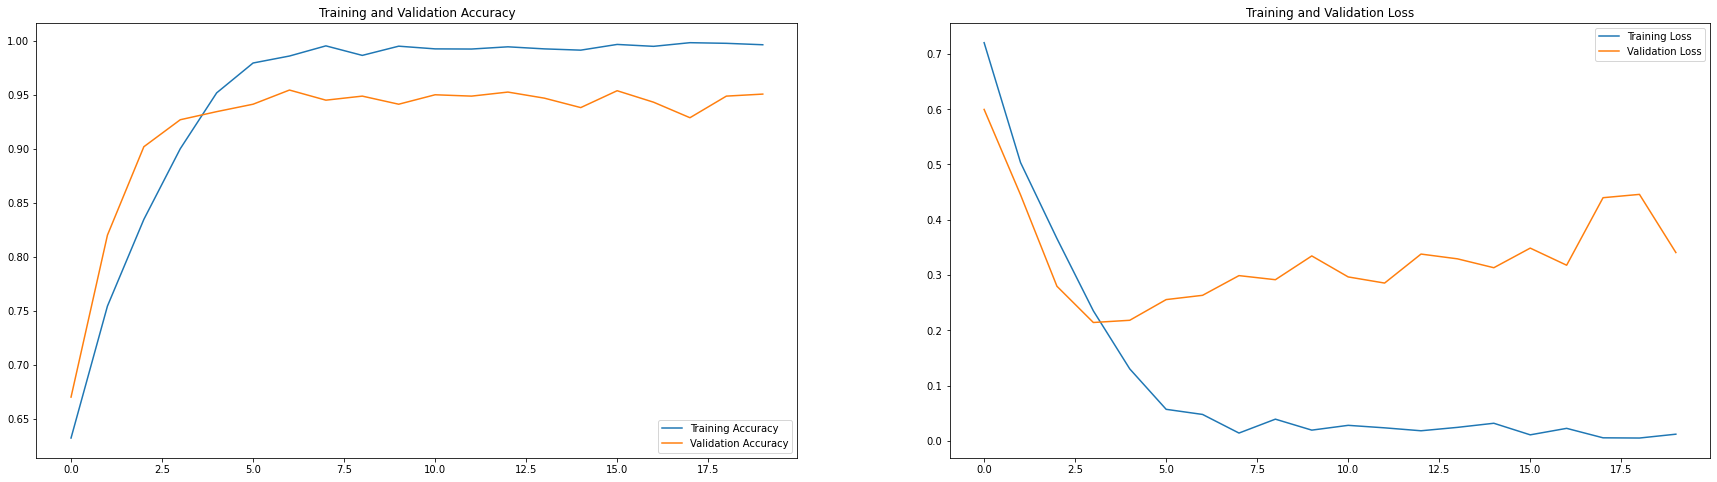

In [21]:
plotting(iter3)